In [96]:
%matplotlib inline

In [97]:
import pandas as pd
import pylab as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.decomposition import PCA
#plt.rcParams['figure.figsize'] = (20., 15.)
#plt.rcParams['font.size'] = 20

In [98]:
data = pd.read_csv("data_source/income_GDP_data.csv")

In [99]:
numerical_variables = data.keys().tolist()
del numerical_variables[0], numerical_variables[0], numerical_variables[-1]

# We select the countries with most avalaible data

In [100]:
aval_countries = pd.DataFrame(pd.DataFrame(data['code']).join(data[numerical_variables].isnull()).groupby('code').sum().sum(axis=1))
aval_countries.columns = ['size']

In [107]:
selected_countries = aval_countries[aval_countries['size']>3000].index
len(selected_countries)

32

# We only keep variables available for 10 % of the data

In [108]:
aval_variables = (-data[numerical_variables].isnull().sum() + len(data)) / len(data)
list_var = aval_variables[(aval_variables) > 0.1].keys().tolist()

In [109]:
selection = data[list_var + ['code', 'year']]

In [110]:
selection = selection[selection['code'].map(lambda x :x in selected_countries)]

In [111]:
inequality = 'gini_DS'
growth = 'national_income_WID'

<matplotlib.colorbar.Colorbar instance at 0x7f2212b143b0>

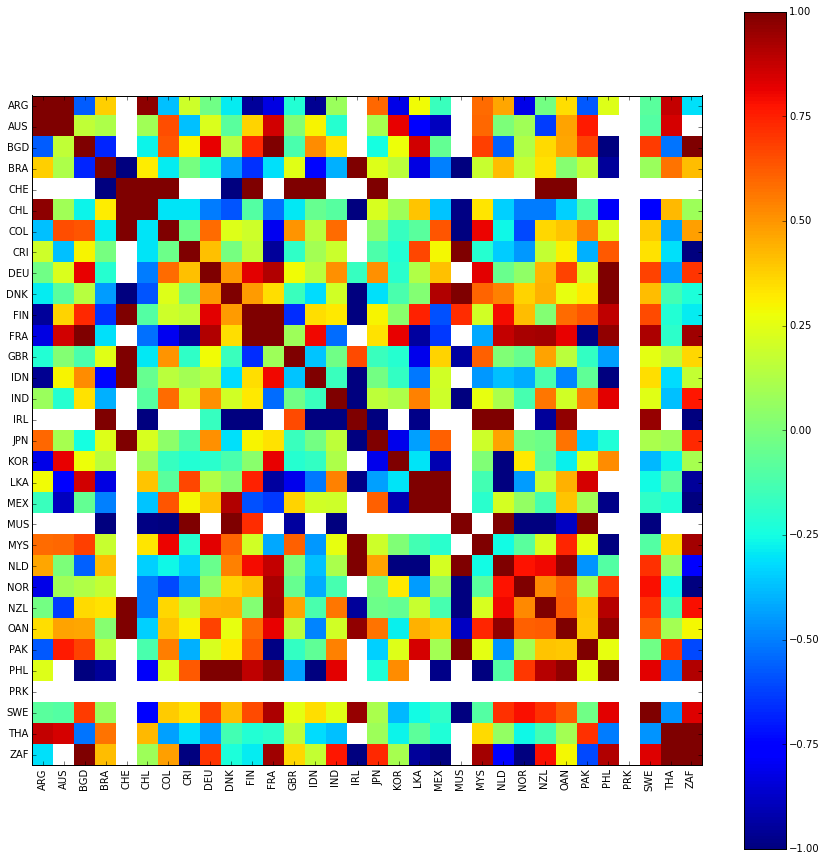

In [113]:
# selection.index = selection['year']
square_data = pd.pivot_table(selection[[inequality, 'code', 'year']], index='year', columns='code', values=inequality)
correlations = square_data.corr()
fig = plt.figure(figsize=(15,15))
plt.imshow(correlations, interpolation='nearest')
plt.xticks(range(0, len(square_data.columns)), square_data.columns, rotation='vertical')
plt.yticks(range(0, len(square_data.columns)), square_data.columns, rotation='horizontal')
plt.colorbar()